Libraries

In [32]:
import cv2 
import numpy as np 
import os
import random
import matplotlib.pyplot as plt
from collections import Counter
import os
from math import sqrt

**Load The Image Data Each Folder Containing 100 data**

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


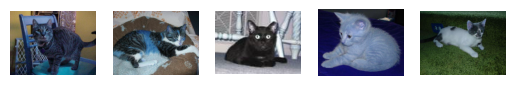

In [33]:
base_path="D:/Download/animals" #path to my dataset folder

categories = ['cats', 'dogs', 'panda'] #List of categories in the dataset also the names of the folders in the dataset
image_paths = [] #Image paths will be stored in this empty list
labels = [] #ALso the Labels will be stored in this empty list

for label, category in enumerate(categories): #Enumeraing through the categories will give me the label for each category and also the labels will be mapped
    folder_path = os.path.join(base_path, category) #As each class data is stored in different folder name of the folder is being joined with base path
    for filename in os.listdir(folder_path): #Entering each class folder
            full_path = os.path.join(folder_path, filename) #Joining the folder path with the filename to get the full path of the image
            image_paths.append(full_path) #Appending the full path of the image to the image_paths list
            labels.append(label) #Appending the mapped label of the image to the labels list

print(labels)
for i in range(5): #Viewing first 5 images of the dataset
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(cv2.imread(image_paths[i]))


**Pre Processed The image data into grayscale**

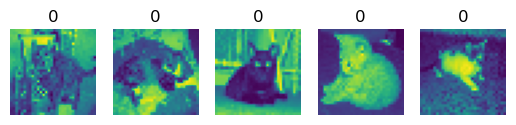

In [ ]:
pre_processed_images = [] #List to store the pre-processed images
for path in image_paths: #Iterating through the image paths
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)#Preprocessing the images by reading them in grayscale
    img_resized = cv2.resize(img,(32, 32))#Resizing the images to 32x32 pixels
    pre_processed_images.append(img_resized.flatten())  #Turning the images into 1D array and appending to the pre_processed_images list

for i in range(5): #Viewing first 5 images of the dataset after pre-processing
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title(labels[i])
    plt.imshow(pre_processed_images[i].reshape(32, 32))




**Defining the K-NN function which is used in cross validation function afterwards **

In [35]:
def knn(train_data, train_labels, validation_datas, k, distance_metric): # Defining the knn function

    predictions = [] #List to store the predictions
    
    for test_point in validation_datas:#Iterating through the validation data got from 6 fold Cross validation
        distances = [] #List to store the distances of the test point from all the training points

        for train_point, label in zip(train_data, train_labels): #Iterating through the training data and labels and zipping them together
            if distance_metric == 'euclidean':##Calculating the euclidean distance between the test point and the training point
                dist = sqrt(np.sum((test_point- train_point) ** 2))##Euclidean distance formula             

            elif distance_metric == 'manhattan':#Calculating the manhattan distance between the test point and the training point
                dist = np.sum(np.abs(test_point - train_point))##Manhattan distance formula
                
            distances.append((dist, label))#Each distance calculated from either euclidean or manhattan distance is appended to the distances list along with the label of the training point
            
        distances.sort(key=lambda x: x[0])#Sorting the distances list based on the distance value in the ditance list
        k_nearest_labels = [label for _, label in distances[:k]]#Getting the labels of the k nearest neighbors where k is iterated from 1-10 in the final code section
        
        most_common = Counter(k_nearest_labels).most_common(1)#Getting the most common label among the value k
        predictions.append(most_common[0][0])#Appending the most common label into the predictions list
    
    return np.array(predictions) 



**Cross Validation function where we using 5 fold cross validation**

In [36]:
def cross_validation(data, labels, k_values, distance_metric):
    fold_size = len(data) // 5 #Using 6 fold cross validation
    accuracies = {k: [] for k in k_values}#I am storing the the values of k in a dictionary with an empty list of accuracies

    combined = list(zip(data, labels))#Combining the data and labels into a single list of tuples and putting it into combined named list
    random.shuffle(combined) #Shuffling the combined so that we dont get the same data for each fold and to avoid biasness in the data
    data, labels = zip(*combined)#Unzipping the combined list into data and labels again as We shuffled the combined list
    
    data = np.array(data) #Converting the data into numpy array
    labels = np.array(labels) #Converting the labels into numpy array

    for fold in range(5):#Iterating through the folds of the cross validation
        val_data = data[fold * fold_size : (fold + 1) * fold_size]##Getting the validation data for the current fold
        val_labels = labels[fold * fold_size : (fold + 1) * fold_size]##Getting the validation labels for the current fold

        train_data = np.concatenate([data[:fold * fold_size], data[(fold + 1) * fold_size:]])##Getting the training data for the current fold by concatenating the data before and after the current fold
        train_labels = np.concatenate([labels[:fold * fold_size], labels[(fold + 1) * fold_size:]])##Getting the training labels for the current fold by concatenating the labels before and after the current fold

        for k in k_values:#Iterating through the values of k
            predictions = knn(train_data, train_labels, val_data, k, distance_metric)##Getting the predictions for the current fold using the knn function which is defined before
            accuracy = np.mean(predictions == val_labels)##Calculating the accuracy of the predictions by comparing the predictions with the validation labels and taking the mean of the correct predictions
            accuracies[k].append(accuracy)##Appending the accuracy of the current fold to the accuracies list for the current value of k

    avg_accuracies = {k: np.mean(accuracies[k]) for k in k_values}##Calculating the average accuracies for each value of k by taking the mean of the accuracies list for each value of k
    return avg_accuracies

**Calling the Functions And plotting the accuracy for better understanding of result**

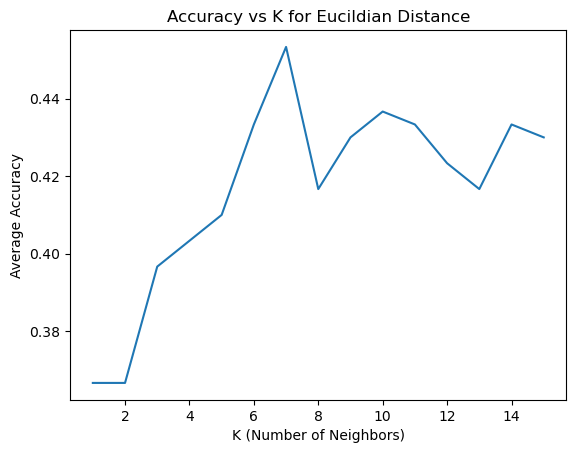

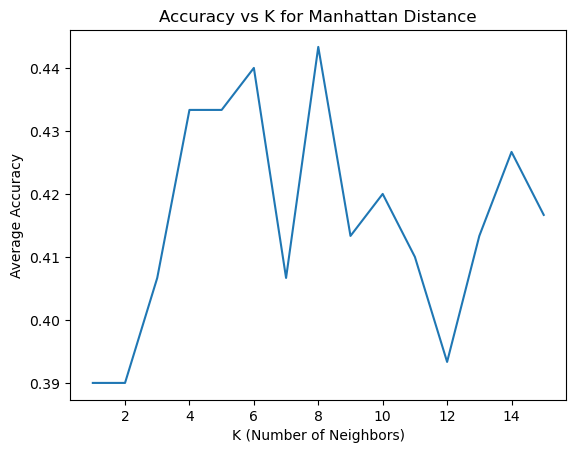

In [ ]:
k_values = range(1, 16) #Taking number of neighbours values from 1 to 15 
avg_accuracies_euclidian = cross_validation(pre_processed_images, labels, k_values, distance_metric='euclidean')#Calculating the average accuracies for euclidean distance
plt.plot(k_values, list(avg_accuracies_euclidian.values()))#Plotting the accuracies for euclidean distance for each value of k
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.title(f'Accuracy vs K for Eucildian Distance')
plt.show()

avg_accuracies_manhattan = cross_validation(pre_processed_images, labels, k_values, distance_metric='manhattan')##Calculating the average accuracies for manhattan distance
plt.plot(k_values, list(avg_accuracies_manhattan.values()))##Plotting the accuracies for manhattan distance for each value of k
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.title(f'Accuracy vs K for Manhattan Distance')
plt.show()


**Discussion**:
 As we can see from the graph above with Euclidian Distance Method as the number of K increased the accuracy was gradually increasing from 37% AND WHEN K=7 the accuracy was at its peak at 45% after that it reduced a bit but kept a consistent accuracy from K in range 8 to 15 from 41% to 43%.
 Where on the other hand although Manhattan stared from the value of 39% and rapidly increased to 44% accuracy when k=6. then it decreased and kept an inconsistent value till k=15. it reached its peak accuracy when k was 8.
 Among both of them it can be considered Manhattan is more reliable when k value is low from 4-6 where as Euclidian is very inconsistent for smaller k values but was consistent for k value 8 to 15.

**DataSet Charecteristics**:
Each had 100 images so there was no unbalanced dataset or biasness. As both method had an accuracy less than 50% it can be said the pixel values extracted from the data are not sufficient to distinguish the classes properly.
Limitation:
(1) Pixel Based Features is not enough to catch higher level patterns from the data.

(2) Calculating distance is not enough to classify the images.

**Potential Improvement**:

(1) Use better Feature Extraction tools along greyScale and dimensionality reduction.

(2) Use Normalization to scale the values from 0-1 to standardize the data.

(3) Remove irrevelant features.

(4) Increasing the dimensionality to 64*64 may increase higher computation time buy may be able to increase the accuracy

**Verdict**:
For the dataset with the extracted feature Euclidian with k value 7 will give the best accuracy with an accuracy of little above 45% and for manhattan the best accuracy would come from k value 8 with an accuracy of little above  44%.

**TOP 5 Predictions**

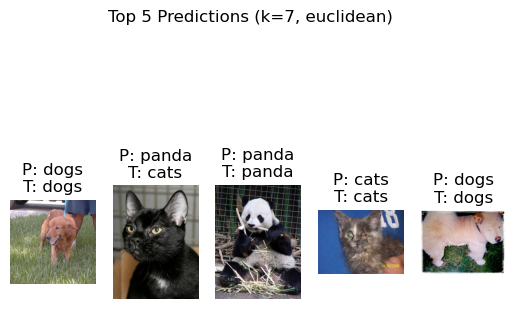

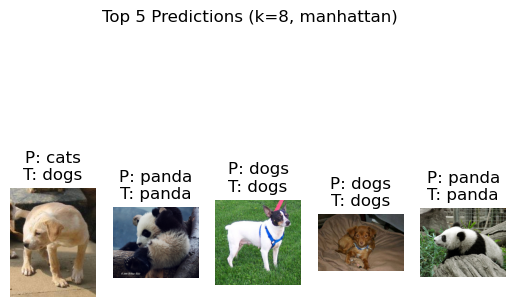

In [79]:
best_k = max(avg_accuracies_euclidian, key=avg_accuracies_euclidian.get) #Getting the best value of k for euclidean distance
distance_metric = 'euclidean'

test_datas = random.sample(range(len(pre_processed_images)), 5)#Selecting 5 random sample data points from the dataset for testing the model
test_images = [pre_processed_images[i] for i in test_datas]#Selecting the images from the pre-processed images list using the sample indices
test_labels = [labels[i] for i in test_datas]#Selecting the labels from the labels list using the sample indices
test_paths = [image_paths[i] for i in test_datas]#Selecting the paths from the image paths list using the sample indices

train_data = np.array(pre_processed_images)##Converting the pre-processed images into numpy array
train_labels = np.array(labels)##Converting the labels into numpy array


predicted_labels = knn(train_data, train_labels, test_images, best_k, distance_metric)##Getting the predictions for the sample images using the knn function which is defined before with euclidean distance


for i in range(5):#Iterating through the sample images to display the predictions and the actual labels
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    img = cv2.imread(test_paths[i])  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"P: {categories[predicted_labels[i]]}\nT: {categories[test_labels[i]]}")
plt.suptitle(f"Top 5 Predictions (k={best_k}, {distance_metric})")
plt.show()

best_k = max(avg_accuracies_manhattan, key=avg_accuracies_manhattan.get)#Getting the best value of k for manhattan distance
distance_metric = 'manhattan'


test_datas = random.sample(range(len(pre_processed_images)), 5)#Selecting 5 random sample data points from the dataset for testing the model
test_images = [pre_processed_images[i] for i in test_datas]##Selecting the images from the pre-processed images list using the sample indices
test_labels = [labels[i] for i in test_datas]
test_paths = [image_paths[i] for i in test_datas]


train_data = np.array(pre_processed_images)
train_labels = np.array(labels)


predicted_labels = knn(train_data, train_labels, test_images, best_k, distance_metric)##Getting the predictions for the sample images using the knn function which is defined before with Manhattan distance


for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    img = cv2.imread(test_paths[i])  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"P: {categories[predicted_labels[i]]}\nT: {categories[test_labels[i]]}")
plt.suptitle(f"Top 5 Predictions (k={best_k}, {distance_metric})")
plt.show()